## Regression Models.



We have a set of measures
  $𝑋=[𝑥_1,𝑥_2,...,𝑥_𝑛]$
and the output $\hat y$, we would like to construct a linear model: 
$\hat y = \alpha_0+ \sum_{𝑗=1}^𝑛 𝑥_𝑗 \alpha_𝑗$
using  $X$  to predict $𝑦$

To find $\alpha$ we solve a least sqaures problem. In matrix form we have
$ 𝑋 \alpha = \hat y$.



Exercise 4.6.8 Meyer

T = time a runner takes to complete a Marathon. T depends on: prevous training; age; weight; height. Weight and Height define the ponderal index = height (in.)/weight(lns). Previous training corresponds to the miles run in the previous 8 weeks. 

T = $\alpha_0 + \alpha_1 x_1 + \alpha_2 x_2 + \alpha_3 x_3 + \epsilon$


In [18]:
A=np.array([ [1, 13.1, 619, 23], [1, 13.5, 803, 42], [1, 13.8, 207, 31], [1,13.1,409,31],[1,12.5,482,45]])

In [19]:
print(A)

[[  1.   13.1 619.   23. ]
 [  1.   13.5 803.   42. ]
 [  1.   13.8 207.   31. ]
 [  1.   13.1 409.   31. ]
 [  1.   12.5 482.   45. ]]


In [20]:
T=np.array([ [181],[193],[212],[221],[248]])
print(T)

[[181]
 [193]
 [212]
 [221]
 [248]]


In [21]:
alpha = np.linalg.solve( A.T@A,A.T@T)
print(alpha)

[[ 5.28685592e+02]
 [-2.56243599e+01]
 [-8.25690462e-02]
 [ 1.80728946e+00]]


In [22]:
xh = np.array([ 1, 74.0/(180.0**(1.0/3.0)), 450, 43])
Tpred = xh@alpha
print(Tpred)

[233.40697245]


Exercise 4.6.6.

After studying a certain type of cancer, a researcher hypothesizes that in the short run the number (y) of malignant cells in a particular tissue grows exponentially with time (t). That is, $y = \alpha_0 e^{\alpha_1 t}$. Determine least squares estimates for the parameters $\alpha_0$ and $\alpha_1$ from the researcher’s observed data given below

t (days)   1 2  3  4  5

y (cells) 16 27 45 74 12


Hint: What common transformation converts an exponential function into a linear function?

We use the logarithm transformation

In [23]:
A = np.array([ [1, 1], [1,2],[1,3],[1,4],[1,5] ]) 

In [24]:
b = np.array([[16],[27],[45],[74],[122]])
blog = np.log(b)


In [25]:
alpha = np.linalg.solve( A.T@A,A.T@blog)
print(alpha)

[[2.27530698]
 [0.50710929]]


In [26]:
xh = np.array([ 1, 6])
bpredlog = xh@alpha
bpred = np.exp(bpredlog)
print(bpred)

[203.96791557]


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


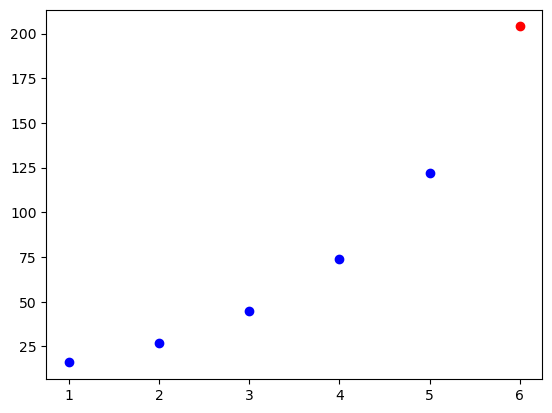

In [27]:
%pylab inline
plot(A[:,1],b,'bo',xh[1],bpred,'ro')

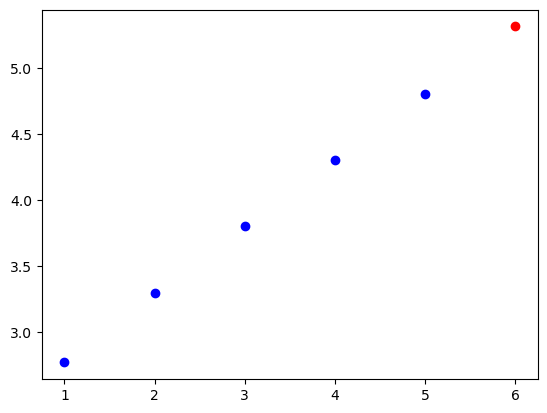

In [28]:

plot(A[:,1],blog,'bo',xh[1],bpredlog,'ro')

Let us presume that yesterday we observed
n = 30 pairs of data ($x_i, y_i$) for i=1,n. The data were generated artificially by an equation such as
$ y = f(x) + \epsilon$ where $\epsilon$ is an error component with distribution $N(0, \sigma^2), \sigma=1e-2$. We use now an example in the book "Azzalini A, Scarpa B., Data Analysis and Data Mining, Oxford University Press, 2012.

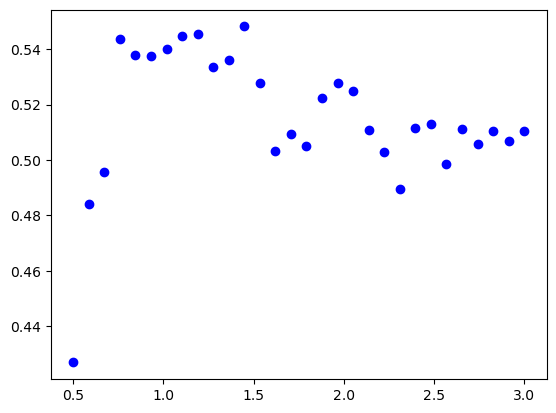

In [29]:
import numpy as np
import urllib.request as ur

url = 'http://azzalini.stat.unipd.it/Book-DM/yesterday.dat'
u = ur.urlopen(url)
localFile = open('yesterday.csv', 'w')
data = u.read()
localFile.write(data.decode('utf-8'))
localFile.close()
datay = np.genfromtxt('yesterday.csv',delimiter=' ',skip_header=1,usecols=(0,1,2)) 
plot(datay[:,0],datay[:,1],'bo')
show()

We solve the least squares problem

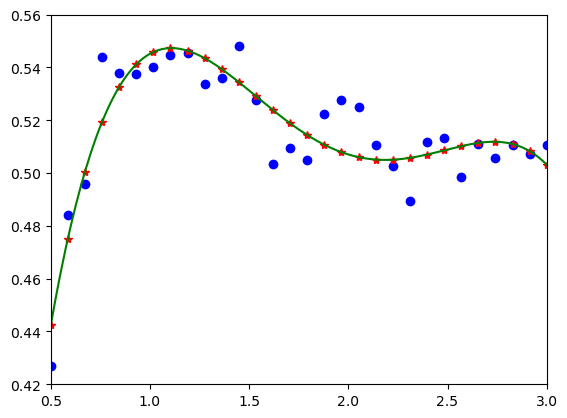

In [31]:
x = datay[:,0]
yest = datay[:,1] #  given information
ytom = datay[:,2]  # tomorrow values

(nx,) =x.shape
xmin = min(x) 
xmax = max(x)
xx = np.linspace(xmin,xmax,200) # points used for evaluation
mp=5
import scipy.linalg as las
A=np.vander(x,mp)
#A=np.zeros([nx,mp])
# Vandermonde matrix,  we look for a polynomial of degree mp-1 that better approximate the data
#A[:,0] = 1
#for j in range(1,mp):
#    A[:,j]=A[:,j-1]*x
#A1=A[:,::-1])
# we solve the least-sqares problem by first computing the QR factorization, the economic mode compute only the first mp column of Q
(Q,R)=las.qr(A,mode='economic')
# after we solve the two linear systems 
p=las.solve(R, np.dot(np.transpose(Q),yest))  # np.dot   @
# we evaluate the polynomial in x and xx
yr=np.polyval(p,x)
yc=np.polyval(p,xx)

# we plot the results
plot(x,yest,'bo', x,yr,'r*',xx,yc,'g-')
axis([xmin,xmax,0.42,0.56])
show()

In [32]:
# add one row in the data and use a previously computed  QR factorization
BT = np.copy(A[0:6,:])
yest_t = np.copy(yest[0:6])
(Qb,Rb)=las.qr(BT,mode='economic')

print('shape of the matrices','R =', Rb.shape,'BT=',BT.shape,'A=',A.shape)

Qyest = np.dot(np.transpose(Qb),yest[0:6])
pb=las.solve(Rb, Qyest)
print('Solution of the problem', pb)

shape of the matrices R = (5, 5) BT= (6, 5) A= (30, 5)
Solution of the problem [ -8.58024134  24.32706842 -26.29007546  13.09187662  -2.04979986]


In [33]:
# Givens rotation to modify the QR factorization
at = np.copy(A[6,:])
bt = np.copy(yest[6])
Rbt = np.copy(Rb)
for j in range(mp):
    tv = np.copy(Rbt[j,:])
    den = np.sqrt(tv[j]**2.+at[j]**2.) # givens rotation sqrt(x^2+y^2)
    cc = tv[j]/den # c element of the Givens matrix
    ss = at[j]/den # s element of the Givens matrix
    Rbt[j,:]=cc*tv+ss*at
    at = -ss*tv+cc*at
    btv = np.copy(Qyest[j])
    Qyest[j]= cc*btv+ss*bt
    bt  = -ss*btv+cc*bt
    
#full factorization with qr_insert  
af = np.copy(A[6,:])
print(af.shape)
print(Rb.shape)
(Qf6,Rf6) = las.qr_insert(Qb, Rb, af, 5)
# Exercise, try to update the right hand side without multiply by the original one by the  traspose of Qf6

# full factorization with the last row added
B = np.copy(A[0:7,:])
yest_t = np.copy(yest[0:7])
(Qbt_6,Rbt_6)=las.qr(B,mode='economic')   
Qyest_6 = np.dot(np.transpose(Qbt_6),yest_t)
pbt=las.solve(Rbt_6, Qyest_6)

#scaling the matrices for comparison
D6 = np.sign(diag(Rbt_6));
D = np.sign(diag(Rbt));
Df6 = np.sign(diag(Rf6));
Rft_6 = np.dot(np.diag( Df6), Rf6)
Rbt_6 = np.dot(np.diag( D6), Rbt_6)
Rbt = np.dot( np.diag( D) , Rbt)
Qyest_6 = np.dot(np.diag(D6), Qyest_6)
Qyest = np.dot( np.diag( D) , Qyest)

print('Comparison of the two factorization = ')
print(np.linalg.norm(Rbt_6-Rbt,np.Inf ))

print('Comparison of the two factorization = ')
print(np.linalg.norm(Rbt_6-Rft_6,np.Inf ))

print('Comparison of the known term   = ')
print(np.linalg.norm(Qyest_6-Qyest))



(5,)
(5, 5)
Comparison of the two factorization = 
4.138546663508964e-15
Comparison of the two factorization = 
4.1494585545365226e-15
Comparison of the known term   = 
4.251726200153254e-15


## Conditioning of least squares problems

In [34]:
import numpy as np
A = np.array([(1, 1000), (0.00099, 1)])
A

array([[1.0e+00, 1.0e+03],
       [9.9e-04, 1.0e+00]])

In [35]:
# condition number of  A and  A'A

print ('condition number of  A:', np.linalg.cond(A))
ATA = A.T.dot(A)
print ('condition number of  A\'A:', np.linalg.cond(ATA))


condition number of  A: 100000200.00009844
condition number of  A'A: 1.0011603907636136e+16


In [37]:
# two collinear predictors 
tmp = np.arange(100)
A = np.zeros((100, 2))
A[:, 0] = tmp + np.random.rand(100) * 0.0000001
A[:, 1] = tmp + np.random.rand(100) * 0.0000001
ATA = A.T.dot(A)
print ('condition number of   A\'A  for the simulating data :', np.linalg.cond(ATA))

print ('condition number of   A for the simulating data :',np.linalg.cond(A) )

U, s, V = np.linalg.svd(A)
print ('singular values :',s, 'smax/smin : ', s[0]/s[1] )
     

condition number of   A'A  for the simulating data : inf
condition number of   A for the simulating data : 3009053329.633578
singular values : [8.10370286e+02 2.69310709e-07] smax/smin :  3009053329.633578


In [43]:
A=np.array([[1, 0],
[1, 1],
[1, 1]])
# we construct a matrix B with  one column almost linear combination of the column of A
B=np.zeros((3,3))
B[:,0:2]=A
B[:,2:3]= np.dot(A, np.array([[1],[0.5]]))+1e-7*np.random.randn(3,1)
print('B = ')
print(B)

B = 
[[1.         0.         1.00000007]
 [1.         1.         1.50000012]
 [1.         1.         1.50000007]]


In [48]:
import scipy as sp
# we introduce a random error  and we compute b as B times a vector of all 1 + an error
c=np.dot(B,np.array([[1],[1],[1]]))+1e-6*np.random.randn(3,1)
# the matrix is non singular so we can solve the system 

x = sp.linalg.solve(B, c)
print('solution of the square linear system')
print(x)

solution of the square linear system
[[-5.27233948]
 [-2.13616775]
 [ 7.27233863]]


In [52]:
resn = np.linalg.norm(B.dot(x)-c,2)/np.linalg.norm(c,2) 
print('residual',resn)

residual 1.2477825699540795e-16


In [53]:
condB= np.linalg.cond(B) 
print ('condition number of   B  :',condB )


condition number of   B  : 128259979.20868142


In [54]:
# the error is bounded by
print(' the error is bounded by', condB*resn/np.linalg.norm(b))

 the error is bounded by 1.0468892101636376e-10


In [ ]:
# least square solution scipy
# lapack_driver = 'gelsd', 'gelsy', 'gelss'
import scipy as sp
import scipy.linalg as spla
betaS, residualsS, rankS, svS = spla.lstsq(B, c,lapack_driver='gelss')  
print ( 'beta:')
print(betaS)
print ('residuals:', residualsS)
print ('rank:', rankS)
print ('singular values:', svS)

beta:
[[-5.27233947]
 [-2.13616774]
 [ 7.27233861]]
residuals: []
rank: 3
singular values: [3.17054315e+00 6.69071613e-01 2.47196606e-08]


In [ ]:
#  we have a very small singular value, compute  an approximate solution  using only the first two  singular value
# the numerical rank could be considered as two
U, s, V = np.linalg.svd(B, full_matrices=0)
xT = np.dot(V[0:2,:].T,(np.dot( c.T, U[:,0:2])/s[0:2]).T)   #se non va metti b al posto di c
print(xT)

[[0.77777956]
 [0.88888683]
 [1.22222288]]


In [ ]:
# the residual is small,has the same order of the error in the data, the data have a better meaning
#
resn = np.linalg.norm(B.dot(xT)-c,2)/np.linalg.norm(b,2)   #se non va metti b al posto di c
print(resn)

5.2579251152420516e-08


## Principal Component Regression

The minimal norm solution of $\| Ax -b \|$ is given by

$$
\sum_{i=1}^r \frac{𝑢^𝑇_𝑖 𝑏}{ \sigma_𝑖}𝑣_𝑖
$$
If the smallest singular values are very small, that is the numerical rank is not the same as the theoretical one, we look for the solution in a subspace of dimension $k$. If we use as basis for this subspace the first $k$ vector of $v_i$ the solution is 

$$
\sum_{i=1}^k \frac{𝑢^𝑇_𝑖 𝑏}{ \sigma_𝑖}𝑣_𝑖
$$

It is useful to find the minimal value of $k$ that make the residual reduction sufficiently small. This algorithm is called  Principal Component Regression

We show an example taken form the book of Larns Elden "Matrix Methods in Data Mining and Pattern Recognition", SIAM, 2007.

Term-document matrices are used in information retrieval. Consider the following selection of five documents.
Key words, which we call terms, are marked in boldface.

Document 1: The <b> Google </b>  <b> matrix </b> $P$ is a model of the <b> Internet</b>.

Document 2: $P_{ij}$ is nonzero if there is a <b>link</b> from <b> Web  page</b> j to i.

Document 3: The <b>Google</b>  <b>matrix</b> is used to rank all <b> Web pages</b>.

Document 4: The <b>ranking</b> is done by solving a <b>matrix</b>  <b>eigenvalue</b> problem.

Document 5: <b>England</b> dropped out of the top 10 in the <b>FIFA</b> ranking.
    
    
Term:

1. eigenvalue 

2. England 

3. FIFA 

4. Google 

5. Internet 

6. link 

7. matrix 

8. page 

9. rank 

10. Web

In [2]:
import numpy as np
#  associated matrix

A = np.array([
[0, 0, 0, 1., 0],
[0, 0, 0, 0, 1.],
[0, 0, 0, 0, 1.],
[1., 0, 1., 0, 0],
[1., 0, 0, 0, 0],
[0, 1., 0, 0, 0],
[1., 0, 1., 1., 0],
[0, 1., 1., 0, 0],
[0, 0, 1., 1., 1.],
[0, 1., 1., 0, 0]])


We have two query vectors:

$q_1$ “contains Google terms"

$q_2$ terms are related only to the “football document.”
    

In [3]:
# query vectors
q1 = np.array([ 
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[1],
[1],
[1]])

q2 = np.array([ 
[0],
[1],
[1],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

In [19]:
# compute the  svd saving only the necessary information
import numpy as np
U, s, V = np.linalg.svd(A, full_matrices=False)
print('singular values = ',s)

A2 = U @ np.diag(s) @ V

print(np.allclose(A2, A, atol=1e-13))

xT = np.dot(V[0:1,:].T,(np.dot( q2.T, U[:,0:1])/s[0:1]).T)
print('solution vector = ')
print(xT)

singular values =  [2.85464601 1.88228579 1.73205081 1.2603301  0.84827142]
True
solution vector = 
[[0.0204104 ]
 [0.01605535]
 [0.04133452]
 [0.02242418]
 [0.01238273]]


In [19]:
print('q1  coordinates  in terms of the first five left singular vectors of U')
print(np.dot( U[:,0:5].T ,q1))
print('q2  coordinates  in terms of the first five left singular vectors of U')
print(np.dot( U[:,0:5].T ,q2))

q1  coordinates  in terms of the first five left singular vectors of U
[[ 1.213196  ]
 [-0.54741677]
 [ 0.76980036]
 [-0.18167938]
 [ 0.39805265]]
q2  coordinates  in terms of the first five left singular vectors of U
[[ 0.15737043]
 [ 0.52145691]
 [ 0.76980036]
 [ 0.78393345]
 [-0.33516354]]


Populating the interactive namespace from numpy and matplotlib
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.15734732]
 [0.12377347]
 [0.31865504]
 [0.17287188]
 [0.09546059]]
[[ 0.11684062]
 [ 0.32821433]
 [ 0.37416071]
 [ 0.03986541]
 [-0.04726654]]
[[-0.17945568]
 [ 0.47636247]
 [ 0.37416071]
 [ 0.03986541]
 [ 0.24902975]]
[[-0.2475251 ]
 [ 0.48264817]
 [ 0.36972437]
 [ 0.14482272]
 [ 0.17781748]]
[[-4.44444444e-01]
 [ 2.22222222e-01]
 [ 6.66666667e-01]
 [ 4.95222792e-16]
 [ 1.11111111e-01]]


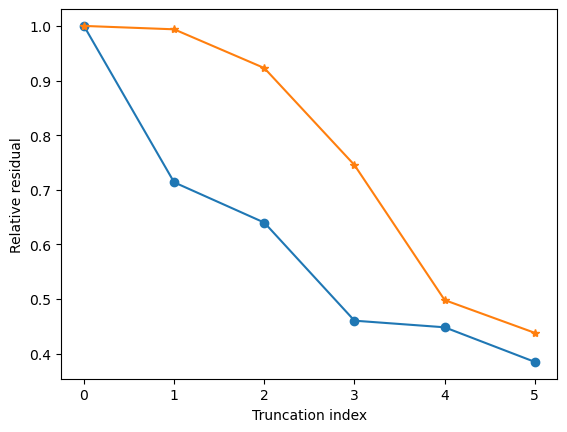

In [17]:
%pylab inline
# residual of the two vectors changing k
res1=np.zeros((6,1)) 
res2=np.zeros((6,1))
nq1 = np.linalg.norm(q1,2)
nq2 = np.linalg.norm(q2,2)
for i in range(0,6):
   # xT1 = np.dot(V[0:i,:].T, np.dot( np.diag(1/s[0:i]),np.dot( U[:,0:i].T ,q1) ))
    xT1 = np.dot(V[0:i,:].T,(np.dot( q1.T, U[:,0:i])/s[0:i]).T)
    res1[i] = np.linalg.norm( np.dot(A,xT1)-q1,2)/nq1
   # xT2 = np.dot(V[0:i,:].T, np.dot( np.diag(1/s[0:i]),np.dot( U[:,0:i].T ,q2) ))
    xT2 = np.dot(V[0:i,:].T,(np.dot( q2.T, U[:,0:i])/s[0:i]).T)
    res2[i] = np.linalg.norm( np.dot(A,xT2)-q2,2)/nq2
    print(xT1)

plot(res1,'-o')
plot(res2,'-*')
xlabel('Truncation index')
ylabel('Relative residual')
show()


If we want to reduce the relative residual to under 0.7 in this example, then
we should choose k = 2 for $q_1$ and k = 4 for $q_2$.

In [20]:
# my implementation of iterative LGK bidiagonalization algorithm
def LGK(A,b,k):
    (m,n)= A.shape # find the shape of the matrix
    tolb = 1e-12
    beta = np.zeros((k+2,1))
    alfa = np.zeros((k+1,1))
    alfag = np.zeros((k+1,1))
    cg = np.zeros((k+1,1))
    da = np.zeros((k+1,1))
    du = np.zeros((k+1,1))
    sg = np.zeros((k+1,1))
    gam = np.zeros((k+1,1))
    P = np.zeros((m,k+2)) 
    Z = np.zeros((n,k+1))
    beta[0]=np.linalg.norm(b,2)
    # initialization
    gam[0]=beta[0]
    P[:,0]= b[:,0]/beta[0]
    # alfa and beta are the elements of the bidiagonal matrix
    Z[:,0]= A.T@P[:,0]
    alfa[0] = np.linalg.norm(Z[:,0],2)
    Z[:,0]  = Z[:,0]/alfa[0]
    P[:,1]= A@Z[:,0] - alfa[0]*P[:,0]
    beta[1]= np.linalg.norm(P[:,1],2)
    P[:,1]  = P[:,1]/beta[1]
    alfag[0] = alfa[0]
    for i in range(1,k+1):
        Z[:,i]= A.T@P[:,i]-beta[i]*Z[:,i-1] 
        alfa[i] = np.linalg.norm(Z[:,i],2)
        Z[:,i]  = Z[:,i]/alfa[i]
        P[:,i+1]= A@Z[:,i] -alfa[i]*P[:,i]
        beta[i+1]= np.linalg.norm(P[:,i+1],2)
        P[:,i+1]  = P[:,i+1]/beta[i+1]
        #  Givens orthogonal matrices for the QR factorization with elements: 
        #    cg e sg  at the step  i-1 not optimized
        cg[i-1] = alfag[i-1]/np.sqrt( alfag[i-1]**2 + beta[i]**2)
        sg[i-1] = beta[i]/np.sqrt( alfag[i-1]**2 + beta[i]**2)
        alfag[i] = cg[i-1]*alfa[i]
        # da and  du  elements on the main and upper diagonal of R 
        da[i-1] = cg[i-1]*alfag[i-1]+sg[i-1]*beta[i]
        du[i-1] = sg[i-1]*alfa[i]
        #  residual and  scaled known term  (scaled by cg) of the  bidiagonal least squares problem  
        gam[i]=-gam[i-1]*sg[i-1]
        if (abs(alfa[i])<tolb or abs(beta[i+1])<tolb):
           break
    #  solution of the least squares problem with bidiagonal matrix upper triangular
    km=i-1
    y = np.zeros((km+1,1) )  #last element
    y[km]=gam[km]*cg[km]/da[km]
  
    for i in range(km-1,-1,-1):
        y[i]=(gam[i]*cg[i]-du[i]*y[i+1])/da[i]
        
    # solution of the original least square problem using km steps 
    x=np.dot(Z[:,0:(km+1)],y[0:(km+1)])
   
    return( (x, P[:,0:km+2],Z[:,0:km+1],beta[0:km+2],alfa[0:km+2],da[0:km+1],du[0:km+1],cg[0:km+1],sg[0:km+1],gam[0:km+2]))    
    

In [38]:
import time
startT = time.time()
(x1,P1,Z1,beta1,alfa1,da1,du1,cg1,sg1,gam1) = LGK(A,q1,5)
endT = time.time()
print('time q1',endT-startT)
print('bidiagonal matrix for  q1')
print( np.round((P1.T@A)@Z1, decimals=10) )
startT = time.time()
(x2,P2,Z2,beta2,alfa2,da2,du2,cg2,sg2,gam2) = LGK(A,q2,5)
endT = time.time()
print('time q2',endT-startT)
print('bidiagonal matrix   for q2')
print( np.round((P2.T@A)@Z2,decimals=10) )


time q1 0.0020258426666259766
bidiagonal matrix for  q1
[[ 2.23606798 -0.         -0.         -0.         -0.        ]
 [ 1.46059349  1.4001488  -0.         -0.         -0.        ]
 [-0.          1.40243497  0.5928733  -0.         -0.        ]
 [-0.         -0.          1.01314418  0.81101522 -0.        ]
 [-0.         -0.         -0.          1.46808128  0.41040331]
 [-0.         -0.         -0.         -0.          1.25699128]]
time q2 0.0012402534484863281
bidiagonal matrix   for q2
[[ 1.41421356  0.         -0.          0.          0.        ]
 [ 1.          1.41421356  0.          0.          0.        ]
 [-0.          2.          1.36930639  0.          0.        ]
 [-0.          0.          1.38744369  0.52306125  0.        ]
 [ 0.          0.          0.          1.31777597  0.87688108]
 [ 0.          0.          0.          0.          1.19203732]]


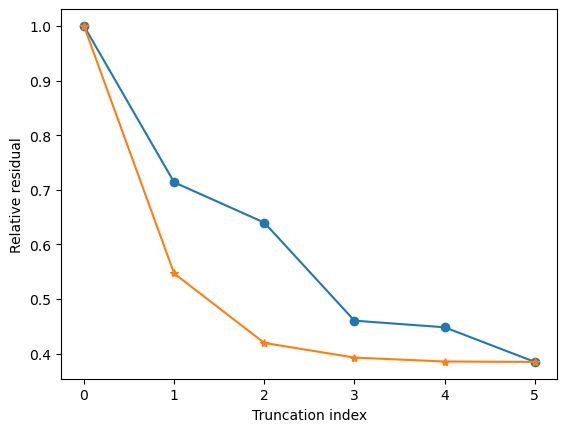

In [39]:
# plot of the residuals
resgam1 = abs(gam1)/nq1
plot(res1,'-o')
plot(resgam1,'-*')
xlabel('Truncation index')
ylabel('Relative residual')
show()

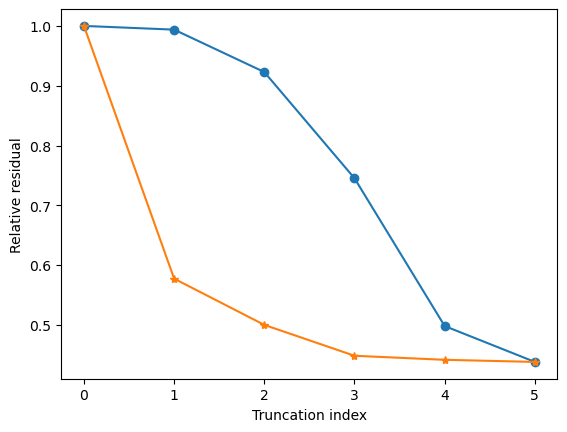

In [40]:
resgam2 = abs(gam2)/nq2
plot(res2,'-o')
plot(resgam2,'-*')
xlabel('Truncation index')
ylabel('Relative residual')
show()

In [41]:
import scipy.sparse as sparse
import scipy.sparse.linalg as spla

In [30]:
As = sparse.csc_matrix(A)

In [31]:
print(As)

  (3, 0)	1.0
  (4, 0)	1.0
  (6, 0)	1.0
  (5, 1)	1.0
  (7, 1)	1.0
  (9, 1)	1.0
  (3, 2)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
  (8, 2)	1.0
  (9, 2)	1.0
  (0, 3)	1.0
  (6, 3)	1.0
  (8, 3)	1.0
  (1, 4)	1.0
  (2, 4)	1.0
  (8, 4)	1.0


In [32]:
As.nnz


17

In [34]:
startT=time.time()
(x1,P1,Z1,beta1,alfa1,da1,du1,cg1,sg1,gam1) = LGK(As,q1,5)
endT = time.time()
print('time sparse q1',endT-startT)
print('bidiagonal matrix for  q1')
print( np.round((P1.T@A)@Z1, decimals=10) )
startT=time.time()
(x2,P2,Z2,beta2,alfa2,da2,du2,cg2,sg2,gam2) = LGK(As,q2,5)
endT = time.time()
print('time sparse q2',endT-startT)
print('bidiagonal matrix   for q2')
print( np.round((P2.T@A)@Z2,decimals=10) )

time sparse q1 0.003329038619995117
bidiagonal matrix for  q1
[[ 2.23606798 -0.         -0.         -0.         -0.        ]
 [ 1.46059349  1.4001488  -0.         -0.         -0.        ]
 [-0.          1.40243497  0.5928733  -0.         -0.        ]
 [-0.         -0.          1.01314418  0.81101522 -0.        ]
 [-0.         -0.         -0.          1.46808128  0.41040331]
 [-0.         -0.         -0.         -0.          1.25699128]]
time sparse q2 0.0017600059509277344
bidiagonal matrix   for q2
[[ 1.41421356  0.         -0.          0.          0.        ]
 [ 1.          1.41421356  0.          0.          0.        ]
 [-0.          2.          1.36930639  0.          0.        ]
 [-0.          0.          1.38744369  0.52306125  0.        ]
 [ 0.          0.          0.          1.31777597  0.87688108]
 [ 0.          0.          0.          0.          1.19203732]]


In [45]:
startT=time.time()
(sol,istop,itn,normr1,normr2,norma,conda,arnorm,normx,var)=spla.lsqr(As, q1, damp=0.0, atol=1e-08, btol=1e-08, conlim=10000000.0,  show=False, x0=None)
endT = time.time()
print('time lsqr',endT-startT)
print(sol,istop,itn,normr1,normr2,norma,conda,normx)

time lsqr 0.0010139942169189453
[-4.44444444e-01  2.22222222e-01  6.66666667e-01 -3.17801341e-15
  1.11111111e-01] 2 5 0.6666666666666664 0.6666666666666664 4.123105625617661 6.846808590780665 0.8388704928078609


In [46]:
startT=time.time()
(sol,istop,itn,normr,normar,norma,conda,normx)=spla.lsmr(As, q1, damp=0.0, atol=1e-08, btol=1e-08, conlim=100000000.0, maxiter=None, show=False, x0=None)
endT = time.time()
print('time lsmr',endT-startT)

time lsmr 0.0012867450714111328


In [48]:
print(sol)

[-4.44444444e-01  2.22222222e-01  6.66666667e-01 -3.15372728e-15
  1.11111111e-01]


In [49]:
print(itn)

5


In [50]:
print(istop)

2


In [51]:
print(normr)

0.6666666666666664


In [52]:
print(normar)

6.454529689251161e-14


In [53]:
print(conda)

2.3250174663991983


In [54]:
(sol,istop,itn,normr,normar,norma,conda,normx)=spla.lsmr(As, q2, damp=0.0, atol=1e-010, btol=1e-010, conlim=100000000.0, maxiter=None, show=False, x0=None)

In [55]:
print(sol)

[ 0.22222222  0.16161616 -0.24242424 -0.18181818  0.80808081]


In [56]:
print(itn)

5


In [57]:
print(normr)

0.6195469181897232


In [58]:
print(normar)

1.9356866777582588e-15


In [59]:
print(conda)

2.4214090320479804


In [60]:
print(As)

  (3, 0)	1.0
  (4, 0)	1.0
  (6, 0)	1.0
  (5, 1)	1.0
  (7, 1)	1.0
  (9, 1)	1.0
  (3, 2)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
  (8, 2)	1.0
  (9, 2)	1.0
  (0, 3)	1.0
  (6, 3)	1.0
  (8, 3)	1.0
  (1, 4)	1.0
  (2, 4)	1.0
  (8, 4)	1.0


In [62]:
k=3
u2,s2,vT2 = spla.svds(As, k=k, ncv=None, tol=1e-15, which='LM', v0=None, maxiter=None, return_singular_vectors=True, solver='arpack') 
A2 = u2 @ np.diag(s2) @ vT2
A4= U[:,0:k] @ np.diag(s[0:k])@ V[0:k,:]
np.allclose(A2, A4, atol=1e-1)

True

In [63]:
print((s[0:k]))
print(s2)

[2.85464601 1.88228579 1.73205081]
[1.73205081 1.88228579 2.85464601]
